In [1]:
from pylab import *
%matplotlib inline

In [2]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    
    #si el paso de integracion es mas pequeno que nuestra h, hacer la h mas pequena
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
        
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

r_v = [x, y, vx, vy ]

In [3]:
def e_mov(r_v,t,fric=0,g=9.8,m=1):
    u = sqrt(r_v[2]**2 + r_v[3]**2)
    dx = r_v[2]
    dy = r_v[3]
    if fric == 0:
        dvx,dvy = 0,-(g/m)
        #print "No use un modelo de friccion"
    else:
        dvx = - fric([r_v[2],r_v[3]])[0]
        dvy = -(g/m) - fric([r_v[2],r_v[3]])[1]
        #print "Use un modelo de friccion"
    return array([dx,dy,dvx,dvy])

In [4]:
def fric_v(v,gamma=0.1):
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y]) 

def fric_v2(v,gamma=0.1):
    norm_v = sqrt(v[0]**2 + v[1]**2)
    f_x = gamma*norm_v*v[0]
    f_y = gamma*norm_v*v[1]
    return array([f_x,f_y]) 

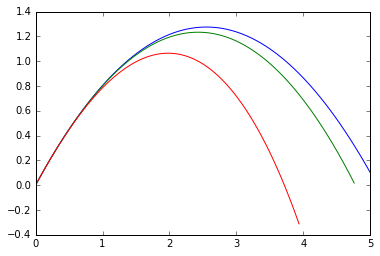

In [5]:
p = [0,0,5,5]
t,sol_id=rk4(e_mov,p,[0,1])
t,sol_fv=rk4(e_mov,p,[0,1],fric_v)
t,sol_fv2=rk4(e_mov,p,[0,1],fric_v2)
plot(sol_id[:,0],sol_id[:,1])
plot(sol_fv[:,0],sol_fv[:,1])
plot(sol_fv2[:,0],sol_fv2[:,1])
show()

In [6]:
print e_mov([1,1,1,1],1)
# print e_mov([1,1,1,1],1,fric_id)
print e_mov([1,1,1,1],1,fric_v)
print e_mov([1,1,1,1],1,fric_v2)

[ 1.   1.   0.  -9.8]
[ 1.   1.  -0.1 -9.9]
[ 1.          1.         -0.14142136 -9.94142136]


In [7]:
print sol_fv2[80,:][1] #Condicion inicial
print sol_fv2[-1,:][1] 

0.486963819865
-0.311193109272


Siguiente clase

In [8]:
for i in range (10):
    print i
    if i ==5:
        break

0
1
2
3
4
5


In [12]:
inicio = [0,0,5,5]
N = 50
trayectoria = zeros((N, len(inicio)))
mi_dt = .1
trayectoria[0,:] = array(inicio)
for i in range(N-1):
    t,sol_dt=rk4(e_mov,trayectoria[i,:],[0,mi_dt],fric_v)
    if sol_dt[-1,:][1] < 0:
        #agarra el punto de la izquierda, punto medio. punto derecho se pasa
        print "buscando punto de rebote"
        dt_busqueda = mi_dt/2
        y_izq = trayectoria[i,:]
        t,sol = rk4(e_mov,trayectoria[i,:],[0,dt_busqueda],fric_v)
        y_med = sol[-1,:]
        while abs(y_izq[1]) > 1e-5:
            if y_izq[1]*y_med[1] < 0:
                reinicio = y_izq
            else:
                reinicio = y_med
            dt_busqueda = dt_busqueda/2
            t,sol = rk4(e_mov,reinicio,[0,dt_busqueda],fric_v)
            y_izq = reinicio
            y_med = sol[-1,:]
            print dt_busqueda
        y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
        trayectoria[i+1,:] = sol_dt[-1,:]

    else:
        trayectoria[i+1,:] = y_izq
    
plot(sol_fv[:,0],sol_fv[:,1],'o')
plot(trayectoria[:,0],trayectoria[:,1],'o')
show()

buscando punto de rebote
0.025
0.0125
0.00625
0.003125
0.0015625
0.00078125
0.000390625
0.0001953125
9.765625e-05
4.8828125e-05
2.44140625e-05
1.220703125e-05
6.103515625e-06
3.0517578125e-06
1.52587890625e-06
7.62939453125e-07
3.81469726563e-07
1.90734863281e-07
9.53674316406e-08
4.76837158203e-08
2.38418579102e-08
1.19209289551e-08
5.96046447754e-09
2.98023223877e-09
1.49011611938e-09
7.45058059692e-10
3.72529029846e-10
1.86264514923e-10
9.31322574615e-11
4.65661287308e-11
2.32830643654e-11
1.16415321827e-11
5.82076609135e-12
2.91038304567e-12
1.45519152284e-12
7.27595761418e-13
3.63797880709e-13
1.81898940355e-13
9.09494701773e-14
4.54747350886e-14
2.27373675443e-14
1.13686837722e-14
5.68434188608e-15
2.84217094304e-15
1.42108547152e-15
7.1054273576e-16
3.5527136788e-16
1.7763568394e-16
8.881784197e-17
4.4408920985e-17
2.22044604925e-17
1.11022302463e-17
5.55111512313e-18
2.77555756156e-18
1.38777878078e-18
6.93889390391e-19
3.46944695195e-19
1.73472347598e-19
8.67361737988e-20
4.33

ZeroDivisionError: float division by zero